# Assignment 2

In this notebook, we will explore a tweet data set from our data host which was scraped using the Twitter API. The term #conflict was used to scrap the data. There aren't any detailed hypotheses yet, however we want to find out whether we can classify tweets by their content and see if we can find any specific patterns between hashtags, tweets, their meaning and sentiment.

First, we import and download the necessary packages in Python.

In [289]:
#Import the frequently used libraries
#Import necessary modules to read, clean, analyse and visualise data

import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob

#This is used to visualise the WordCloud
from PIL import Image
from IPython.display import Image as im

Install wordcloud to visualise WordCloud 

In [290]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [291]:
#Import wordcloud library

from wordcloud import WordCloud

In [292]:
#Import necessary packages for textual and sentiment analysis 

import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


#These functions are used for preprocessing mainly
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Now, we want to take a look into our data. For that reason, we will use Pandas read_csv() function to put the data into a DataFrame.

In [293]:
data_con = pd.read_csv("conflict.csv") #reading our tabular data into a Python dataframe

Next, we want to take a look into our data shape and some simple statistical key values.

What is the type of our data?

In [294]:
type(data_con)

pandas.core.frame.DataFrame

We want to get a sense of how the dataframe looks like. We will look up the first 5 rows to see how the data is structured and which columns are presented.

In [295]:
data_con.head() #Returns the first few rows in a DataFrame

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-10-18 10:53:02,b'\xe2\x80\x98Reclaimed ruins\xe2\x80\x99 : Az...,b'24matins_uk',"['World', 'Conflict']",2496
1,2020-10-18 10:31:30,b'Similarly in Luxembourg - 3\xef\xb8\x8f\xe2\...,b'MichalKianicka',['conflict'],111
2,2020-10-18 10:22:39,b'Azerbaijan going strong! The spirit on this ...,b'medinavie1',"['stoparmenianaggression', 'stopArmenianTerror...",35
3,2020-10-18 09:58:08,b'\xe2\x96\xaa NAGORNO-KARABAKH CONFLICT Arme...,b'arirangtvnews',"['Armenia', 'Azerbaijan', 'CONFLICT']",8662
4,2020-10-18 09:52:08,"b""Much of the #conflict over #Covid19 is reall...",b'carlgroves10',"['conflict', 'Covid19', 'crisis', 'news', 'MPs']",12


In [296]:
data_con.tail() #Returns the last few rows

,timestamp,tweet_text,username,all_hashtags,followers_count
95,2020-10-17 08:02:23,b'#Armenia attacked again on civilians. #Ganja...,b'ella111991',"['Armenia', 'Ganja', 'Mingachevir', 'missile',...",45
96,2020-10-17 07:43:14,b'#Azerbaijan: - armenians shell #Ganja which ...,b'Hajiyev7Mukhtar',"['Azerbaijan', 'Ganja', 'conflict', 'civilians...",101
97,2020-10-17 07:26:14,b'CFR - Campaign Foreign Policy Roundup: What ...,b'AFG_in_Media',"['Afghanistan', 'AFG', 'USA', 'foreginpolicy',...",839
98,2020-10-17 07:25:45,b'Misuse of #terrorism laws during #conflict c...,b'appcsocialmedia',"['terrorism', 'conflict', 'APPNews']",52781
99,2020-10-17 06:51:51,b'@France24_en @bagirova_z #Armenia #Terror #R...,b'vesile95201866',"['Armenia', 'Terror', 'Republic', 'conflict', ...",16


#### There are a few things, that don't seem quite right in the DataFrame. 

1. tweet_text and username both start with either 'b or b"
2. There are some strings that are not words and they seem to start with \x followed by other letters and numbers
3. hashtags are in brackets, which is not wrong, but we will need to change that so that we can better analyse the words 
4. There are words that are completely written in capital letters

Another thing to note: The rows seem to be sorted after 'timestamp' which refers to the date of the tweet.

#### Before we go on with cleaning the data, we will take a look at some other features of the data set. 

What was the time span of all tweets collected?

In [297]:
last_tweet=data_con.iloc[0].timestamp
first_tweet=data_con.iloc[-1].timestamp
format_date="%Y-%m-%d %H:%M:%S"
time_span=datetime.strptime(last_tweet, format_date)-datetime.strptime(first_tweet, format_date)
print("Tweets were collected over the time of:", time_span)
print('The first tweet was postet on:', first_tweet, 'and the last tweet was posted on:', last_tweet)

Tweets were collected over the time of: 1 day, 4:01:11
The first tweet was postet on: 2020-10-17 06:51:51 and the last tweet was posted on: 2020-10-18 10:53:02


Which columns do we have in our DataFrame?

In [298]:
data_con.columns #Returns the names of all columns

Index(['timestamp', 'tweet_text', 'username', 'all_hashtags',
       'followers_count'],
      dtype='object')

What are the data types of our columns?

In [299]:
#df["column_name"].dtype returns the data type of one column. 

data_con['timestamp'].dtype 

#"O" stands for object, which is a string

dtype('O')

In [300]:
data_con['followers_count'].dtype 

#"int64" stands for a value stored as a 64 bit integer

dtype('int64')

In [301]:
data_con.dtypes #Returns the data type for each columns within a dataframe

timestamp          object
tweet_text         object
username           object
all_hashtags       object
followers_count     int64
dtype: object

As we can see, most of our data is categorical, except for followers_count. For that reason, we will explore some objects in greater detail such as tweet_text and all_hashtags. 

#### But before we do that, some more descriptions about our data set are given here:

What is the shape of our DataFrame?

In [302]:
print(data_con.shape) #df.shape will return the number of rows and columns in my given dataframe
print('This DataFrame consists of',data_con.shape[0], 'rows and', data_con.shape[1], 'columns' )

(100, 5)
This DataFrame consists of 100 rows and 5 columns


What are some interesting key facts about our data set?

In [303]:
data_con.describe(include='all') #displays the most important statistics of the data set

,timestamp,tweet_text,username,all_hashtags,followers_count
count,100,100,100,100,100.00000
unique,100,100,78,89,NaN
top,2020-10-17 19:00:58,b'An honourable woman trips up &amp; a dishono...,b'ksgrossman',"['Cosponsor', 'HR961', 'SafeAct', 'loyal', 'al...",NaN
freq,1,1,8,5,NaN
mean,NaN,NaN,NaN,NaN,5129.81000
std,NaN,NaN,NaN,NaN,16497.71912
min,NaN,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,NaN,187.75000
50%,NaN,NaN,NaN,NaN,848.00000
75%,NaN,NaN,NaN,NaN,2513.00000


#### There are some interesting things that we can tell from data_con.describe. Just a few are summarised here:
1. We have 100 unique tweets written by 78 users
2. 89 unique hashtags were used
3. The average followers_count is surprisingly high (5129,81) which could mean that there might be some verified users such as media outlets or politicians tweeting about conflict related content
4. followers_count ranges from 0 to 139144

What are the minimum and maximum values for followers_count?

In [304]:
print('Minimum followers:',data_con.followers_count.min())
print('Maximum followers:',data_con.followers_count.max())

Minimum followers: 0
Maximum followers: 139144


What is the median value for followers_count?

In [305]:
print('50% of tweets come from users with higher or lower numbers of followers than',data_con.followers_count.median())

50% of tweets come from users with higher or lower numbers of followers than 848.0


Data Cleaning and Pre-processing


We want to take a deeper look into the context of the tweets and hashtags in this notebook. For further semantical and textual analysis, we have to clean our data. This is also calles pre-processing in Natural Language Processing. It includes steps like normalising, removing stopwords, punctuation, mentions and HTML links as well as word tokenisation and word lemmatising. 

Some cleaning steps have been implemented in retrospect because errors or unlikely results became visible only afterwards, e.g. while displaying most frequent words (replacement of &amp --> & for example).

In [306]:
#Pre-processing of hashtags

def preprocess_hashtags(hashtags):
    """This function will clean the hashtags through removal of the brackets 
    and converting all letters to the lower case for better understanding. 
    Punctuations will be removed as well followed by tokenisation of each hashtag"""
    hashtags=hashtags.replace('[','') #Replaces the brackets
    hashtags=hashtags.replace(']','')
    hashtags=hashtags.translate(str.maketrans('', '', string.punctuation)) #makestrans() translates each punctutation to none = ''
    #The following tokenisation is not necessarily needed for the hashtags since no lemmatising/semantic analysis will be done. 
    hashtag_tokens=word_tokenize(hashtags.lower()) #word_tokenize returns a tokenised version with divided substrings and lower cases
    return " ".join(hashtag_tokens) #Joins all tokenised substrings

#Get the number of hashtags for each tweet

def hashtag_len(hashtags):
    """This function returns the number of hashtags used within a tweet"""
    hashtag_tokens=word_tokenize(hashtags) #Tokenisation is necessary to create substrings which then can be countet
    return len(hashtag_tokens)


#Prints out hashtags for each tweet and the number of hashtags used

for hashtags in data_con.all_hashtags:
    output_length = hashtag_len(preprocess_hashtags(hashtags)) #passes the output of the first function into the argument of the second function
    print(preprocess_hashtags(hashtags))
    print(output_length)
    print("")

world conflict
2

conflict
1

stoparmenianaggression stoparmenianterrorism karabakhisazerbaijan karabaghisazerbaijan prayforgandja prayforganja ganjacity nagornokarabagh conflict
9

armenia azerbaijan conflict
3

conflict covid19 crisis news mps
5

landmine yemen geopolitics conflict uxo middleeast
6

helpustohelpthem refugees syrianchildren syria syriawar war conflict endpoverty shelter feedthehungry humanrights
11

stepanakert armenia conflict
3

contemporary family infidelity temptation love conflict truth
7

climate conflict migration morality
4

india blockade indianoceanregion military conflict communist china ladakh
8

war conflict victims people funeral mother pain mourning grave armenia stopazerbaijan
11

conflict
1

afghanistan afg war conflict terrorism
5

climatechange lakechad poverty conflict lakechad actonlakechad
6

miscommunication conflict
2

afghanistan afg pakistan haqqani helmand war conflict terrorism
8

conflict nagornokarabakh turkey
3

conflict
1

indianoccupie

Similar cleaning is done for the tweet text. However, more steps are needed:

In [307]:
#Pre-processing of tweets

"""Stop words such as 'the', 'and', 'a' etc. should be excluded from our tweets.
This is due to several reasons: Stop words are very frequent and would interfere with our semantic and textual analysis 
as well as word classification. """

stop_words = set(stopwords.words('english')) #This function defines a set of stop words within the English language




"""The next cleaning step of tweet data includes regular expression operations, word_tokenize, 
WordNetLemmatizer and nltk.pos_tag from the nltk library"""

def preprocess_tweets(tweet):
    """This function will clean the tweets through several steps for better understanding and further analysis. 
    Steps include lowering cases, replacing punctuations, removal of b's, removal of special strings,
    removal of URLS, removal of hashtags and tags, removal of stopwords and tokenisation and lemmatisation of tweet words"""
    #Converts all uppercase characters into lowercase characters
    tweet=tweet.lower() 
    #Replaces &amp; with &
    tweet=tweet.replace('&amp;','&')
    #Removes the 'b'' or 'b"'  string at the beginning of each tweet
    tweet = re.sub(r"(b')|(b\")","",tweet, flags=re.MULTILINE)
    #Removes characters with random string and integer combinations, such as "\xe2x80x9c"
    tweet = re.sub(r'[0-9]*\\x+([a-z]|[0-9]|[\\])*[^A-Z]', "", tweet)
    #Removes URLs via regular expression operations. Any pattern that starts with http (or https... ) followed by one or more non-white-space characters will be removed
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #Removes tags with '@' and hashtag character '#'
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Removes any punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Removes stopwords and tokenises tweet string to substrings
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #Defines lemmatizer using WordNetLemmatizer from nltk.stem
    lm = WordNetLemmatizer()
    #Lemmatises each pre-filtered tweet token with the correct POS (part of speech) tag 
    lemmatized_words = [lm.lemmatize(w, get_pos(w)) for w in filtered_words]

    return " ".join(lemmatized_words) #joins all tokenised and cleaned strings



"""nltk.pos_tag returns the POS tag for a given word (verb, noun etc.).
Get the correct nltk.pos_tag for each word with get_pos:"""

def get_pos(word):
        """Maps the POS tag to a character to pass it on via a dictionnary"""
        tag = nltk.pos_tag(word)[0][1][0].lower() #Returns the first string of the POS tag for the word (e.g. n,j,v)
        """WordNet is our lexical database which includes nouns, verbs, adjectives and adverbs. 
        Other words such as prepositions are ignored"""
        tagging_dict = {"j": wordnet.ADJ, #Creates dictionnary with POS tags which is needed for lemmatize()
                "n": wordnet.NOUN,
                "r": wordnet.ADV,
                "v": wordnet.VERB}
        return tagging_dict.get(tag, wordnet.NOUN) #value=wordnet.Noun if no other value is found for the tag

    
    
    
"""Next, we want to get the number of strings within each cleaned tweet"""  

def clean_tweet_len(tweet):
    """Returns the number of strings in a tweet"""
    tweet_tokens=word_tokenize(tweet)
    return len(tweet_tokens)



# Finally, we want to print our results to take a look:

for tweets in data_con.tweet_text:
    print(preprocess_tweets(tweets))
    print("")

ruin azerbaijan show karabakh conquest world conflict

similarly luxembourg art 259 case almost 12 last decade era conflict 33

azerbaijan going strong spirit independence day prominent ever stoparmenianaggression stoparmenianterrorism karabakhisazerbaijan karabaghisazerbaijan prayforgandja prayforganja ganjacity nagornokarabagh conflict

nagornokarabakh conflict armenia accuses azerbaijan violating new truce within minute armenia azerbaijan conflict

much conflict covid19 really pay cost crisis cowardly government unwillingness upset affluent news mp bbc news newspaper headline mp flouted 10pm curfew young job crisis

anyone help identify landmine initial guess pmn4 variant black pressure plate khahi body found yemen even 2018 geopolitics conflict uxo middleeast

ongoing war syria forced million syrian families flee home helpustohelpthem clicking link refugee syrianchildren syria syriawar war conflict endpoverty shelter feedthehungry humanrights

emotional morning filming permission f

After all the cleaning steps, we want to create a DataFrame with all columns that we find useful for our further analysis.

In [308]:
clean_tweets = data_con.loc[:,("username","followers_count")] #Creates DataFrame with original columns username and followers_count


clean_tweets['Clean_tweet'] = data_con['tweet_text'].apply(preprocess_tweets)#Adds a new column with cleaned tweets
clean_tweets['Clean_hashtags'] = data_con['all_hashtags'].apply(preprocess_hashtags) #Adds a new column with cleaned hashtags
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len) #Adds a new column with number of hashtags for each tweet
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len) #Adds a new column with number of strings within each tweet

ASSERTS

After cleaning our data, we want to make sure that our data set only comprises of values that are desired. For that reason, we will use asserts to make sure that we can properly continue analysing our data.

In [309]:
"""This assert makes sure that all hashtags are in lower case or numerical values"""

for hashtag in clean_tweets.Clean_hashtags: #each hashtag is one str object 
    for letter in hashtag:
        """letters in the string might be lower case, numeric (e.g. in covid19) 
        or white space characters, since '' seperates the joint hashtag terms"""
        assert (letter.islower() | letter.isnumeric() | letter.isspace()) 

In [310]:
"""This assert makes sure that all words in tweets are in lower case or numeric values"""

for tweet in clean_tweets.Clean_tweet:
    for letter in tweet:
        """letters in the string might be lower case, numeric (e.g. in covid19) 
        or white space characters, since '' seperates the joint hashtag terms"""
        assert (letter.islower() | letter.isnumeric() | letter.isspace()) 

In [311]:
#The above asserts already make sure that hashtags and tweets only comprise of alphabetical or numerical values.
#Nevertheless, we will add some more asserts, just in case.


"""This assert makes sure that words and hashtags do not contain any punctuation"""

#We make use of re.findall() that matches a certain pattern against a string and returns all matched patterns as a list

punc_list=[]
for hashtag in clean_tweets.Clean_hashtags:
    for letter in hashtag:
        pattern = r'[[].?\-",&@#]' #pattern includes any possible punctuations, hashtags and tags
        punctuation = re.findall(pattern,letter) #returns a list with objects that match the patterm
        punc_list.extend(punctuation) #punc_list is extended by the punctuation list

for tweet in clean_tweets.Clean_tweet:
    for letters in tweet:
        pattern_tweet = r'[[].?\-",&@#]'
        punctuation = re.findall(pattern_tweet,letters)
        punc_list.extend(punctuation)
        
"""By iterating through all possible punctuations separately, 
we can see directly which punctuation caused the assert to fail"""
        
if '.' in punc_list:
    assert False #use boolean for assert to fail 
if ',' in punc_list:
    assert False
if '[' in punc_list:
    assert False
if ']' in punc_list:
    assert False   
if '-' in punc_list:
    assert False  
if '?' in punc_list:
    assert False  
if '-' in punc_list:
    assert False  
if '"' in punc_list:
    assert False  
if '\\' in punc_list:
    assert False  
if '&' in punc_list:
    assert False 
if '@' in punc_list:
    assert False 
if '#' in punc_list:
    assert False

In [312]:
"""This assert makes sure that tweets do not start with b' or b" anymore. 
However, we have checked for punctuation removal already"""

for tweet in clean_tweets.Clean_tweet:
    if tweet[0]=='b': #if tweet starts with b check for second character
        if (tweet[1]=="'") or (tweet[1]=='"'):
            assert False

In [313]:
"""This assert makes sure that there aren't any strings that start with \\x as seen in the original twitter data set"""

x_list=[]
for tweet in clean_tweets.Clean_tweet: 
    xpattern = r'\\x+' #pattern includes \x
    x_letter = re.findall(xpattern,tweet) #returns a list with objects that match the patterm
    x_list.extend(x_letter)

#Check whether x_list comprises any patterns found
if '\\x' in x_list:
    assert False

In [314]:
"""This assert makes sure that there aren't any URLS in the data set"""
ht_list=[]
for tweet in clean_tweets.Clean_tweet:
    ht_pattern = r'(htt|www)' #pattern includes htt or www
    ht_string = re.findall(ht_pattern,tweet) #returns a list with objects that match the patterm
    ht_list.extend(ht_string)
    

#Check whether ht_list comprises any patterns found
if 'htt' in ht_list: 
    assert False
if 'www' in ht_list:
    assert False

Now that we have a clean data set, we have to take a look at some key statistics to see whether there are any specifics:

In [315]:
clean_tweets.describe(include='all') #This includes both numerical and categorical values

,username,followers_count,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count
count,100,100.00000,100,100,100.00000,100.000000
unique,78,NaN,96,88,NaN,NaN
top,b'ksgrossman',NaN,please cosponsor hr961 safeact horse loyal all...,cosponsor hr961 safeact loyal ally conflict wa...,NaN,NaN
freq,8,NaN,5,5,NaN,NaN
mean,NaN,5129.81000,NaN,NaN,6.19000,16.810000
std,NaN,16497.71912,NaN,NaN,3.74623,7.119038
min,NaN,0.00000,NaN,NaN,1.00000,3.000000
25%,NaN,187.75000,NaN,NaN,3.00000,11.750000
50%,NaN,848.00000,NaN,NaN,6.00000,17.500000
75%,NaN,2513.00000,NaN,NaN,8.25000,22.250000


#### A few special features and key statistics:

1. The unique value for Clean_tweet shows us that there are duplicates within the Clean_tweet column
2. The maxmimum number of hashtags used in a tweet is 16, the maximum number of strings within cleaned tweets is 31
3. The minimum values for hashtags and words within a tweet are 1 and 3, respectively
4. The average number of hashtags used per tweet is 6.19
5. The average number of tokenised words per tweet is 16.81

Although there were 100 unique tweets in the original data set, there are duplicated in the preprocessed tweet data set. This might be due to the removal of different hashtags or tags, which means that only the tokenised words are duplicates. Although we might loose some important hashtags, duplicated will be removed. This is because the data set is very small and duplicates would influence the frequency of specific words heavily.

In [316]:
#Remove rows with same Clean_tweet content
clean_tweets.drop_duplicates(subset="Clean_tweet",keep="first",inplace=True) #drops duplicates and keeps the first version of it

In [317]:
#new indexing so that removed duplicate row indeces won't be missing in further analysis 
clean_tweets.reset_index(drop=True, inplace=True) #drops the index

clean_tweets.index.values.max() #returns the last row index of the data set

95

In [318]:
"""This assert makes sure that there are as many unique tweets as number of rows"""

if not len(list(clean_tweets.Clean_tweet.unique())) == clean_tweets.shape[0]:
    assert False

In [319]:
"""This assert makes sure that the indexing is correct"""

if not clean_tweets.index.values.max() == (len(list(clean_tweets.Clean_tweet.unique()))-1): #-1 since indexing starts at 0
    assert False

Now that we have a clean data set, let us take a look at some key characteristics of the data:

In [320]:
clean_tweets.head() #returns the first few rows of the DataFrame

,username,followers_count,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count
0,b'24matins_uk',2496,ruin azerbaijan show karabakh conquest world c...,world conflict,2,7
1,b'MichalKianicka',111,similarly luxembourg art 259 case almost 12 la...,conflict,1,12
2,b'medinavie1',35,azerbaijan going strong spirit independence da...,stoparmenianaggression stoparmenianterrorism k...,9,17
3,b'arirangtvnews',8662,nagornokarabakh conflict armenia accuses azerb...,armenia azerbaijan conflict,3,13
4,b'carlgroves10',12,much conflict covid19 really pay cost crisis c...,conflict covid19 crisis news mps,5,25


What is the tweet with the highest number of words?

In [321]:
#iloc will return the output for the column index, idxmax() looks for the row with the highest value for df.column

print("'", clean_tweets.iloc[clean_tweets["Word_count"].idxmax(),2], "'", "is the tweet with the highest word count.") 

' kind thinking make armenian leadership direct attack civilian population far conflict zone midnight knowing military target 1 terrorist thinking 2 mental disorder 3 desperation 4 0 respect intl law 5 stoparmenianterrorism ' is the tweet with the highest word count.


What is the tweet with the highest number of hashtags used?

In [322]:
print("'",clean_tweets.iloc[clean_tweets["Hashtag_count"].idxmax(),2], "'", "is the tweet with the highest number of hashtags used.") 

' today positive vibe make sure say thank advice conflict positivevibes positivevibe adviceoftheday lifeadvice goodadvice adviceforlife selflove selfdevelopment worth acceptance helpfultips solution acknowledge roberteblackmon ' is the tweet with the highest number of hashtags used.


We already know about the average word count and hashtag count. But how are they distributed?

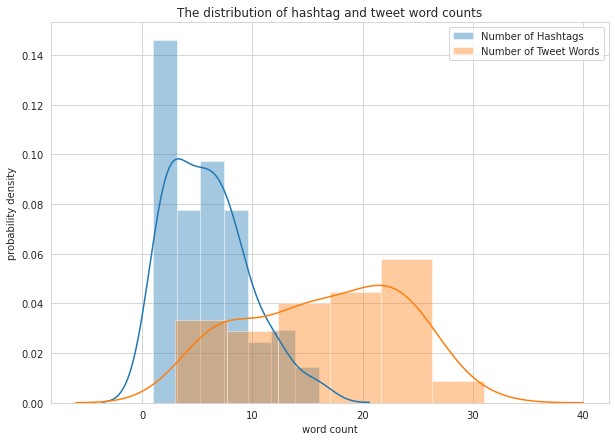

In [323]:
%matplotlib inline 
#Shows graphs in jupyter directly

sns.set_style("whitegrid") #Adds a whitegrid to the graph

plt.figure(figsize=(10,7)) #Changes the size of the graph

chart = sns.distplot(clean_tweets["Hashtag_count"], label="Number of Hashtags") #The distplot function creates a chart
chart = sns.distplot(clean_tweets["Word_count"], label="Number of Tweet Words")

chart.set_title("The distribution of hashtag and tweet word counts") #Gives the chart a title
chart.set(xlabel='word count', ylabel='probability density') #Sets labels for both axes
chart.legend()
plt.show()

As we can see, the distribution of hashtag counts is more narrow and peaks higher than the distribution of tweet word counts. This makes sense since a tweet post is limited in its character space but tends to comprise more 'normal' words instead of hashtags (words with a # sign). Thus, the number of hashtags normally is much lower than the overall Tweet word count. We can also see that most of the tweets have less than 5 hashtags. When it comes to the Twitter word count, it is hard to tell which word size was the most frequent one. It seems like a lot of tweets comprise of around 20-25 words. However, we have excluded stop words, so this data is not very accurate. 

Now, we can finally start looking at the sentiment of the tweets. We want to try to understand whether a tweet is mainly negative, postive or neutral in its meaning/emotion/sentiment. In this case, we will use TextBlob for sentiment analysis.

The polarity will tell us about the sentiment and emotion of each tweet. The sentiment values lie between -1 and 1, with -1 being strongly negative, 1 strongly positive and 0 being neutral.

In [324]:
def get_polarity(tweet):
    '''
    This function uses TextBlob to categorise each tweet based on its 
    sentiment value either to positive (>0), negative (<0) or neutral sentiment (=0).
    '''
    analysed_tweets = TextBlob(tweet)
    if analysed_tweets.sentiment.polarity > 0:
        return 'Positive'
    elif analysed_tweets.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
def get_sentiment(tweet):
    '''
    This function uses TextBlob to return the sentiment value.
    '''
    analysed_tweets = TextBlob(tweet)
    return analysed_tweets.sentiment.polarity

Next, we want to apply two new columns with the 'Polarity' and 'Sentiment' values for each tweet. Then, we will create a dictionnairy to display the ratio of positive, negative and neutral tweets.

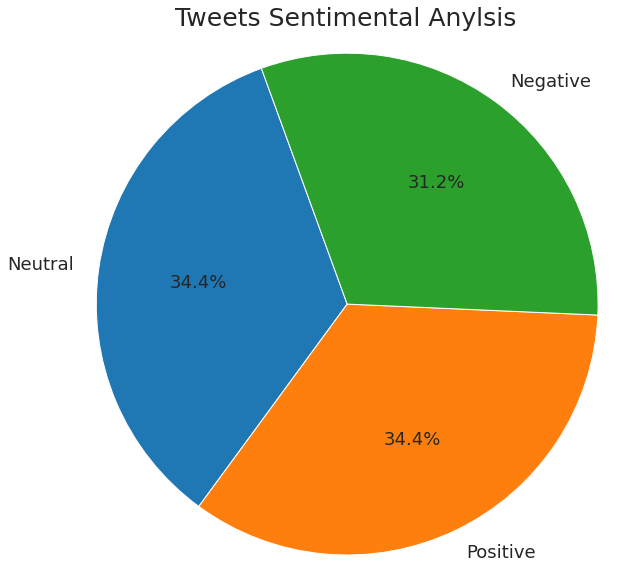

In [325]:
#Apply new columns with polarity and sentiment values

clean_tweets['Polarity'] = clean_tweets["Clean_tweet"].apply(get_polarity) #Adds new column with categorical polarity values
clean_tweets['Sentiment'] = clean_tweets["Clean_tweet"].apply(get_sentiment) #Adds new column with numerical sentiment values

#Create a new dictionnairy with the frequency of each polarity within the data set

senti_tweets={} #Create new dictionnary 
for index in clean_tweets['Polarity'].value_counts().index: #iterate through all possible polarities
    if index == 'Neutral':
        senti_tweets["Neutral"]= clean_tweets['Polarity'].value_counts()[index] #Add frequency of Neutral polarities to the dict
    elif index == 'Positive':
        senti_tweets["Positive"]= clean_tweets['Polarity'].value_counts()[index] #Add frequency of Positive polarities to the dict
    else:
        senti_tweets["Negative"]= clean_tweets['Polarity'].value_counts()[index] #Add frequency of Negative polarities to the dict
        

%matplotlib inline 
#Shows graphs in jupyter directly

#Plot the polarity of tweets 
fig, ax = plt.subplots(figsize=(10, 10)) #Set the figure size of the graph
ax.pie(senti_tweets.values(), labels=senti_tweets.keys(), autopct='%1.1f%%', startangle=110, textprops={'fontsize': 18}) #autopct displays the percentage of each category on the graph
#Axis is set as 'equal' so that the pie chart is a circle which sums up to 100%
ax.axis('equal') 
plt.title('Tweets Sentimental Anylsis', size = 25)


plt.show()

The pie chart displays that the polarity of tweets is quite evenly distributed. There are slightly more tweets that have an overall neutral or positive sentiment or opinion. Both make up 34.4%, respectively. On the other hand, negative tweets are slightly less frequent with only 31.2% of all tweets. 

This might be surprising due to the fact that we scraped data using the term 'conflict' which usually is perceived as a negative sentiment or linked to crisis. 

Reasons for inaccuracies could be due to the small data set or the TextBlob Analyzer. In addition, it might be the case that 'conflict' here is used in a different context and not related to any international politics. Examples could be 'conflict management at work' etc. 

To further analyse the sentiment and the patterns associated with the term and frequency of 'conflict', we will calculate the conflict count further down in the notebook.

In [326]:
#Take a look at the first and last sentiment values calculated
clean_tweets["Sentiment"]

0     0.000000
1     0.000000
2     0.466667
3     0.136364
4     0.287500
        ...   
91   -0.100000
92    0.050000
93   -0.125000
94    0.000000
95    0.250000
Name: Sentiment, Length: 96, dtype: float64

Now we want to find out what the average word count is for tweets with specific polarities:

In [327]:
filter_pos=clean_tweets["Polarity"]=="Positive" #Creates filter to select all rows where "Sentiment" is "Positive"
pos_mean=((clean_tweets.where(filter_pos))["Word_count"].mean())#The filter is applied with daf.where() and mean values of the Word_count are stored into a variable

filter_neg=clean_tweets["Polarity"]=="Negative" #Filter for negative tweets
neg_mean=((clean_tweets.where(filter_neg))["Word_count"]).mean()

filter_neu=clean_tweets["Polarity"]=="Neutral" #Filter for neutral tweets
neu_mean=((clean_tweets.where(filter_neu))["Word_count"]).mean()

#Define a dictionnairy to print out results
dic_sent_means={'Positive word mean':pos_mean,'Negative word mean':neg_mean, 'Neutral word mean':neu_mean}
print(dic_sent_means)

{'Positive word mean': 19.151515151515152, 'Negative word mean': 19.333333333333332, 'Neutral word mean': 11.181818181818182}


After the display of the sentiment for each tweet, we want to take a look into the frequency of the word 'conflict' within a tweet. Since the data set was scraped using the hashtag #conflict, we expect that word to accure most frequently across all tweets.

Notably, we have removed hashtags from the cleaned tweets. However, in most cases the term was still used as a normal string in the tweet:

In [328]:
def conflict_per_tweet(tweet):
    """This function uses TextBlob's 'word_count' to 
    count the frequency of the word 'conflict' for each tweet"""
    conflict_tweets=TextBlob(tweet) #Creates a TextBlob object to analyse
    conflict_count=conflict_tweets.word_counts["conflict"] #Counts frequency of the term 'conflict' within a TextBlob
        
    return conflict_count

#Next, we want to add these values to a new column in our data set:

clean_tweets['Conflict_count'] = clean_tweets["Clean_tweet"].apply(conflict_per_tweet) 
#gets the frequency of 'conflict' for each cleaned tweet and puts it in a new column
    

After we computed the sentiment values and the frequencies of the word 'conflict' for each tweet, it would be interesting to see if there is a relation between the sentiment value and the occurence of the word 'conflict':

<Figure size 720x720 with 0 Axes>

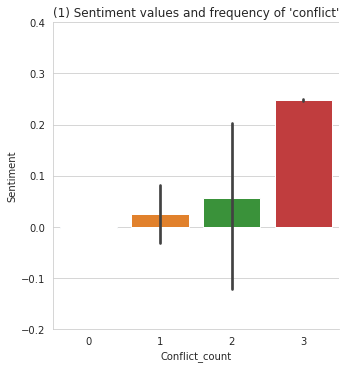

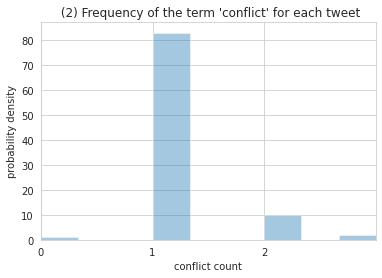

In [329]:
#Graph about the relation between sentiment values and conflict term frequency


sns.set_style("whitegrid") #Adds a whitegrid to the graph
plt.figure(figsize=(10,10)) #Sets the figure size

conflict_sentiment=sns.catplot(x='Conflict_count', y='Sentiment', data=clean_tweets, kind='bar')#sns.catplot() with kind="bar" creates a barchart with error bars to show confidence intervals
conflict_sentiment.set(xlabel="Conflict_count",ylabel="Sentiment") #Labels the axes
conflict_sentiment.set(title="(1) Sentiment values and frequency of 'conflict'") #Sets a title
plt.xticks(np.arange(0,4,1)) #Sets the start, end and tick size
plt.yticks(np.arange(-0.2,0.4,0.1))
plt.show()

#Graph about the frequency of the term 'conflict' in each tweet

chart = sns.distplot(clean_tweets["Conflict_count"], kde=False) #The distplot function with kde=False creates a histogram-like chart 
chart.set_title(" (2) Frequency of the term 'conflict' for each tweet") #Gives the chart a title
plt.xlim(0,3) #Sets min and max for tips shown on the x-axis
plt.xticks(np.arange(0,3,1)) #Sets the start, end and tick size
plt.yticks(np.arange(0,90,10))
chart.set(xlabel='conflict count', ylabel='probability density') #Sets labels for both axes
plt.show()

As we can see in graph (1), the increasing frequency of the term conflict goes along with higher sentiment values. 

Positive sentiment values indicate that the overall sentiment polary is positive. However, one could think that the graph suggests that the increased occurence of the term 'conflict' is associated with a positive sentiment. 

Notably, these results are not significant at all. Based on the overlapping error bars in graph (1) we can tell that the confidence interval for term frequencies 1 and 2 are very huge. Thus, these results are not very informative. 


However, the error bars of term frequencies 2 and 3 are not overlapping. This might be strange, since we expect that 'conflict' is associated to negative sentiments. 

One possible explanation could be that the TexBlob Sentiment analysis is not very accurate, since it is not an individually trained model. Another explanation could be, that we simply do not have enough data to display significant results.

In graph (2) we can see that the term 'conflict' was mentioned once in most of the tweets (>80). Only a small portion of tweets actually used the term zero, twice or three times. 

For further exploration, we could try NaiveBayesAnalyzer() instead of the default PatternAnalyzer as the analyzer of our choice for the TextBlob Sentiment Analysis.

Let us take a look at the frequency of followers_count values. Is there a relation between the number of followers a user has and the amount of hashtags they use?

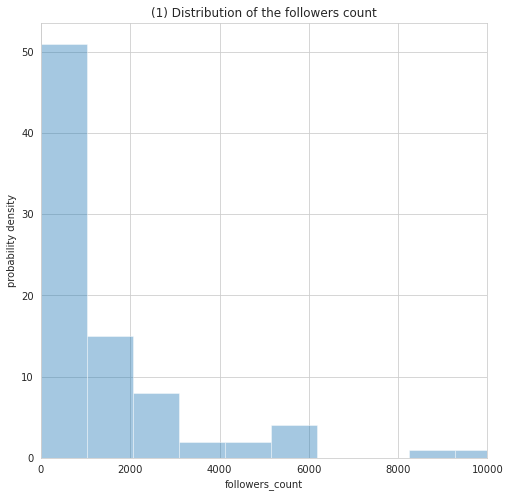

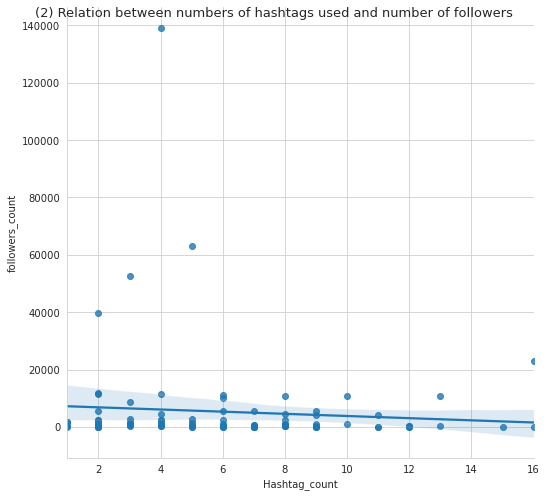

In [330]:
#Histogram-like graph to display the frequency of followers numbers
plt.figure(figsize=(8,8))
chart = sns.distplot(clean_tweets["followers_count"], kde=False, bins=135) #The distplot function creates a chart with the frequency of followers_count values
chart.set_title("(1) Distribution of the followers count") #Gives the chart a title
plt.xlim(0,10000) #Sets min and max for tips shown on the x-axis
#plt.xticks(np.arange(0,10000,1000)) #Sets the start, end and tick size
chart.set(xlabel='followers_count', ylabel='probability density') #Sets labels for both axes
plt.show()


#lmplot to show the relation between followers count and number of hashtags used
#lmplot is a scatterplot with an optional regression line which marks the best available fit for the trend
chart_scatter=sns.lmplot( x="Hashtag_count", y="followers_count", data=clean_tweets, fit_reg=True, height=7, aspect=1.1) #Calculates regression line as well as height and width of the lmplot figure
fig = chart_scatter.fig #Gives access to the figure to set title
fig.suptitle("(2) Relation between numbers of hashtags used and number of followers", fontsize=13) #Adds a title to the figure

plt.show()




As we can tell from graph (1), most users have a follower base of below 1000. Approximately 13 users have a follower base between 1000 and 2000. Only a few users have more than 3000 followers. Notably, the graph displays follower numbers only until 10000 for better visualisation since there is only a small number of outliers in the range of 100,000 followers.

In graph (2), we can see a slightly negative correlation between the follower count and the amount of hashtags used. With decreasing follower numbers, the amount of hashtags seem to increase. This might be due to heavy fluctuations in the follower number as seen in the light blue shadowed region around the regression line.

A possible explanation for the negative correlation could be due to the fact that a high follower count is associated with verified users such as media outlets or news agencies. News agencies and other official accounts might use less hashtags and only important ones to emphazise their professionalism and the importance of their tweet message. Private users on the other hand might tend to use a larger number of hashtags, that goes into the two-digit range.

In the next boxplot, we want to visualise the distribution of  follower count values in the given polarity categories. Can a pattern be recognised?

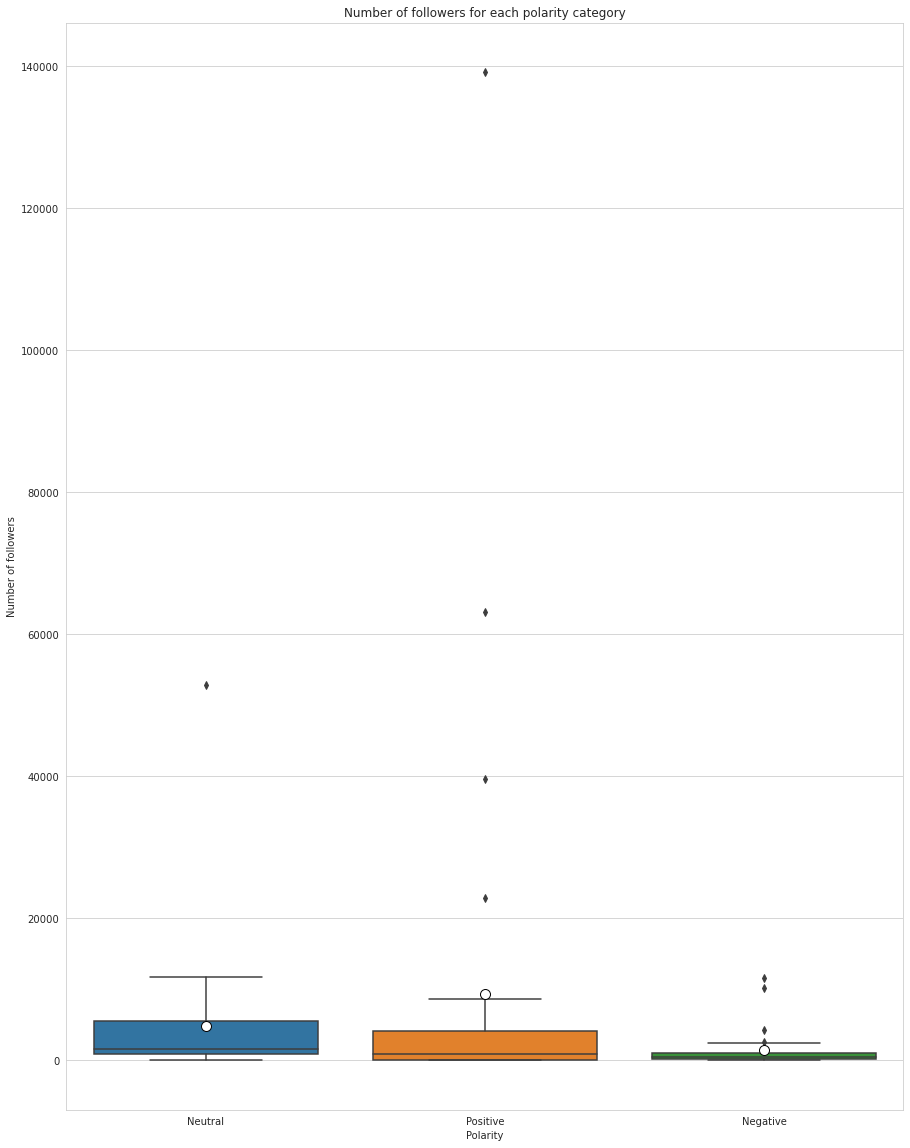

In [331]:
#Create boxplot for followers_count and polarity values
plt.figure(figsize=(15,20))
ax=sns.boxplot(x="Polarity", y="followers_count", data=clean_tweets, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white","markeredgecolor":"black", "markersize": "10"}) #Creates boxplots for each day with the respective proportion values and shows the mean value
ax.set(xlabel="Polarity", ylabel="Number of followers") #Sets labels for both axes
ax.set_title("Number of followers for each polarity category") #Sets a title for the graph
plt.show()

We can see that tweets with a positive sentiment polarity tend to be associated with a slightly larger follower base on average. This might be due to the large amounts of outliers that reach a follower count of almost 140000. 

The small size of the data set could be the reason for heavy fluctuations. However, most of the high follower outliers seem to be within the positive sentiment category. Interestingly, that would mean that user with higher followers and thus media outlets or news agencies tend to post tweets that are more positive in their meaning and emotion. 

On the other side, the 75% interquartile of the neutral category is larger than the one of the positive category. This means that 75% of all followers that have posted tweets with a neutral sentiment have a higher follower base than 75% of the followers that posted tweets with a positive sentiment. 

Overall, tweets with a negative sentiment were posted from users with the lowest average follower base. 







WORDCLOUD and WORD FREQUENCIES

Now that we have looked into some relations between the frequency of the word 'conflict' and sentiment as well as the relation between followers count and other values, we want to take a look at other frequently mentioned words using WordCloud. 

We do this in order to categorise our tweets better and to see, whether we can find a pattern. The main question that we are asking ourselves is: 

What are the 'conflict' tweets about? Is there a way to categorise them? Is there a pattern between hashtags used and the sentiment values? Is there a pattern between hashtags and tweet topics? 

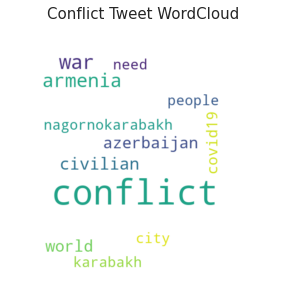

In [332]:
#Create a WordCloud to display most frequent words in all tweets

image_mask = np.array(Image.open('circle.png')) #Image processing using np.array(Image.open())

#Use pre-installed WordCloud function and image_mask to build a WordCloud with frequently used terms in tweets
wc = WordCloud(width=500, height=500, background_color="white", max_words=12, mask=image_mask) 
clean_string = ''.join(clean_tweets["Clean_tweet"]) #wc works on string objects
#frequency of each word in clean_string
wc=wc.generate(clean_string) #Generates a WordCloud on string object 



#Now display the WordCloud

f = plt.figure(figsize=(5,5)) #Sets the figure size

plt.imshow(wc, interpolation='bilinear') #Displays data on a 2D regular raster with wc being an array-like or PIL image
#interpolation='bilinear' will make a less 'blocky' image of a small array
plt.title('Conflict Tweet WordCloud', size=15) #Sets the title
plt.axis("off") #Removes the background and axes 
plt.show()

We will do the same for the hashtag terms:

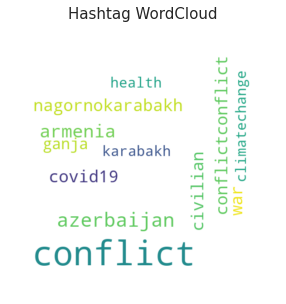

In [333]:
#Generate WordCloud for frequently used hashtags


image_mask = np.array(Image.open('circle.png')) #Image processing using np.array(Image.open())

wc = WordCloud(width=500, height=500, background_color="white", max_words=12, mask=image_mask)
clean_hasht = ''.join(clean_tweets["Clean_hashtags"])
wc.generate(clean_hasht)

f = plt.figure(figsize=(5,5))

#Now display the WordCloud

plt.imshow(wc, interpolation='bilinear') #Displays data on a 2D regular raster with wc being an array-like or PIL image
plt.title('Hashtag WordCloud', size=15)
plt.axis("off")
plt.show()

As we can see, the top 12 terms are quite similar to each other with only a few variations. 
Since we used the term 'conflict' to srcap our data, it is clear that it appears as the biggest term in the image. 
Besides 'conflict' we can also see terms as 'covid19', 'azerbaijian', 'armenia', 'civilian', 'karabakh' and 'nagornokarabakh' very prominently in both WordClouds.

This might be due to the ongoing covid-19 crises as well as the Nagorno-Karabakh (a part of Azerbaijan controlled by Armenians) conflict in Armenia-Azerbaijan.

For a better quantification of often used terms in tweets and hashtags, we will now calculate the frequency of the most common terms.

Another possibility to display frequently mentioned terms can be done using 'value_counts()'. Here, we will create a new dataframe that displays the most prevalent words and their frequency of occurence in tweets.

In [334]:
#Frequency of most common terms in "Clean_tweet" is calculated

#Create a new DataFrame with tokenised words of all tweets
df_words = pd.DataFrame(nltk.tokenize.word_tokenize(clean_string), columns=["words"])
#Count the frequency of each word using value_counts()
word_freq = df_words["words"].value_counts() #This is a pandas.series


#Convert series to a dictionnairy to a dataframe
frame_word_freq = {"word": word_freq.index, "frequency": word_freq} #Creates a dictionnairy
df_word_freq = pd.DataFrame(frame_word_freq) #Creates a DataFrame 
df_word_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with words that appear less than 7 times
df_word_freq = df_word_freq.drop(df_word_freq[df_word_freq.frequency < 7].index) 

The same is done for hashtags:

In [335]:
#Frequency of most common terms in "Clean_hashtags" is calculated

#Create a new DataFrame with tokenised words of all hashtags
df_hashtags = pd.DataFrame(nltk.tokenize.word_tokenize(clean_hasht), columns=["hashtags"])
#Count the frequency of each word using value_counts()
hasht_freq = df_hashtags["hashtags"].value_counts()


# hasht_freq is a series. It will be converted into a dataframe to easily create a barchart
frame_hasht_freq = {"hashtag": hasht_freq.index, "frequency": hasht_freq} #Creates a dictionnairy 
df_hasht_freq = pd.DataFrame(frame_hasht_freq) #Creates a DataFrame 
df_hasht_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with hashtags that appear less than 4 times
df_hasht_freq = df_hasht_freq.drop(df_hasht_freq[df_hasht_freq.frequency < 4].index)

Now, we can finally create a barplot to display the most frequent words used in tweets and hashtags:

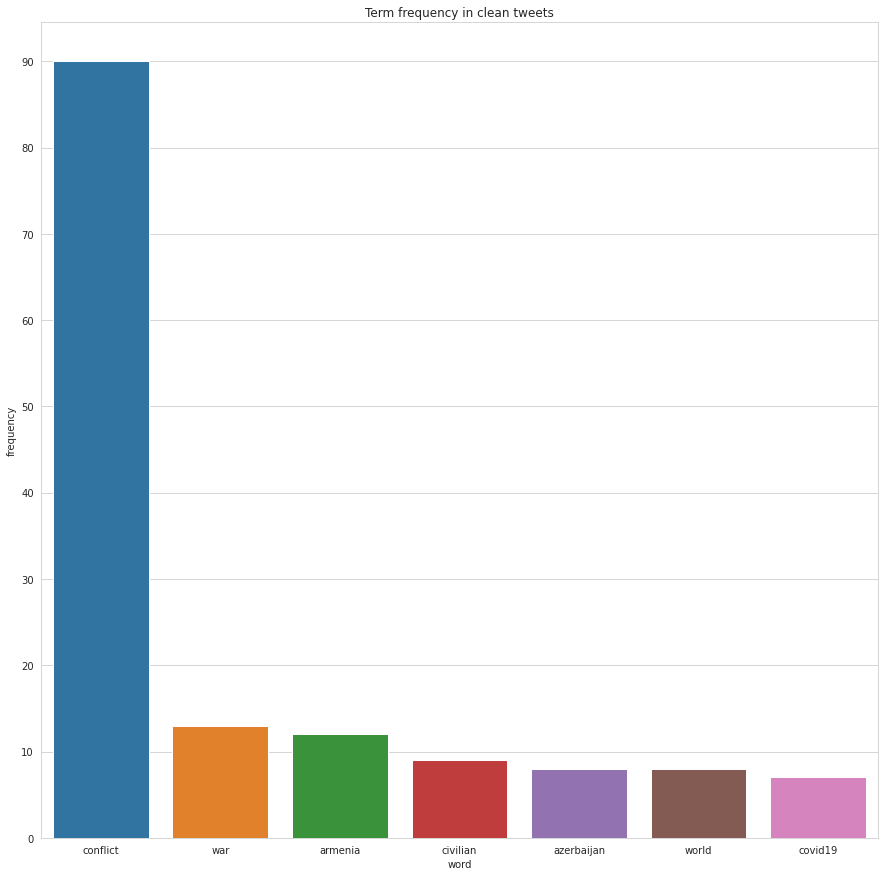

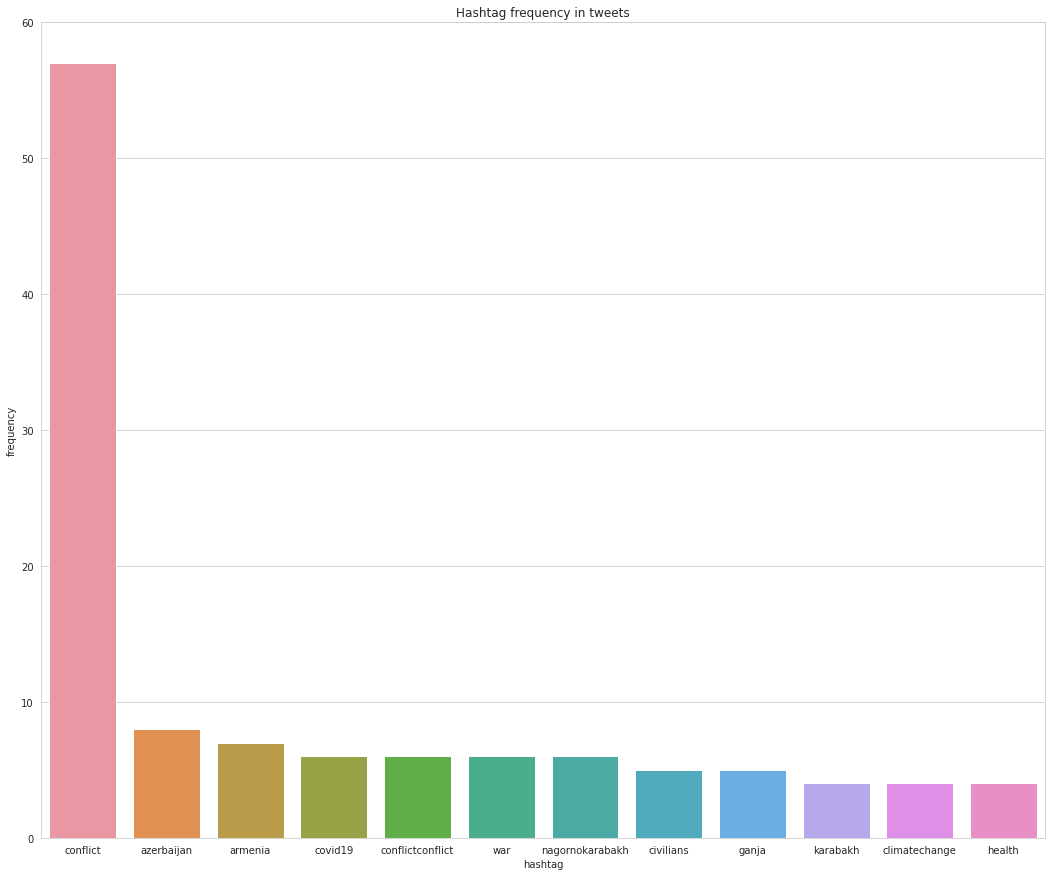

In [336]:
#Barplot fof frequency of terms in Clean_tweet

plt.figure(figsize=(15,15)) #Sets figure size

ax=sns.barplot(x="word",y="frequency", data=df_word_freq) #Creates a barchart for each word and its frequency
ax.set(title="Term frequency in clean tweets") #Sets the title
plt.yticks(np.arange(0,100,10)) #Sets the min, max values and tick size
plt.show()

#Barplot of frequency of terms in Clean_hashtags
plt.figure(figsize=(18,15)) #Sets figure size

hasht_ax=sns.barplot(x="hashtag",y="frequency", data=df_hasht_freq) #Creates a barchart for each word and its frequency
hasht_ax.set(title="Hashtag frequency in tweets") #Sets the title
plt.yticks(np.arange(0,70,10)) #Sets the min, max values and tick size
plt.show()

As we can see, the term conflict is unquestionably the top used term, since it was mentioned approx. 90 times in tweets and over 55 times as a hashtag.

More interestingly however, the second most frequent term used in tweets is 'war', closely followed by 'armenia'. In tweets, the term 'armenia' was mentioned more often than 'azerbaijan'.

In hashtags however, it is quite the opposite with 'azerbaijan' being mentioned more frequently than 'armenia'.

Additionally, there are a lot of other terms associated with the Armenia-Azerbaijan conflict, that are used quite often, such as 'karabakh' and 'nagornokarabakh'. This is in accordance with the WordCloud image. 

One explanation could be that users who post about conflicts in azerbaijan or armenia are likely to talk about 'karabakh' and 'nagornokarabakh' as well, since the war is named after this region.

Besides these terms, there are also hashtags such 'health' and 'climatechange' used, whereby the frequency is less than 5 times. 

Now that we have calculated and visualised the frequency of these terms, we want to find out whether specific hashtags are associated with tweets of a specific sentiment value.

For that reason, we will use a short script that calculates the average sentiment value for all rows where a specific hashtag was used:

In [337]:
#Create lists for average sentiment values and hashtags used

sent_hasht_list=[]
tag_list=[]

#Iterate through all frequently mentioned hashtags listed in df_hasht_freq
for hashtag in df_hasht_freq.hashtag:
    tag=hashtag 
    index=0 #start indexing to iterate through sentiment values
    hashtag_count=0 #start indexing to get number of tweets with respective hashtag
    sent_value=0 #Sets value at 0 for every new hashtag
    
    
    #Iterates through all hashtag strings to find the desired hashtag
    
    for row in clean_tweets.Clean_hashtags: #Iterates through all hashtag strings
        token_hashtags=nltk.tokenize.word_tokenize(row) #Tokenises hashtags to create a list
           
        if index <= clean_tweets.index.values.max(): #Iterates as long as index is equal to the amount of rows 
            if tag in token_hashtags: #Performs the operation if frequently mentioned hashtag is found in that row 
                sent_value=sent_value+clean_tweets.Sentiment[index] #Adds the respective sentiment value to the variable
                hashtag_count=hashtag_count+1 #Hashtag counter +1 
                
        index+=1 
        
        
    #Calculates the average sentiment value if the hashtag was found       
    if hashtag_count > 0:   
        sent_average=sent_value/hashtag_count
        
        #Adds values to the list
        sent_hasht_list.append(sent_average)
        tag_list.append(tag)
        print('Tweets that include', tag, 'as a hashtag have an average sentimental value of', sent_average)
        

Tweets that include conflict as a hashtag have an average sentimental value of 0.031874949269480514
Tweets that include azerbaijan as a hashtag have an average sentimental value of -0.007441077441077439
Tweets that include armenia as a hashtag have an average sentimental value of -0.010227272727272727
Tweets that include covid19 as a hashtag have an average sentimental value of 0.10451388888888886
Tweets that include war as a hashtag have an average sentimental value of -0.14545454545454548
Tweets that include nagornokarabakh as a hashtag have an average sentimental value of 0.01944444444444444
Tweets that include civilians as a hashtag have an average sentimental value of -0.20055555555555551
Tweets that include ganja as a hashtag have an average sentimental value of -0.025555555555555564
Tweets that include karabakh as a hashtag have an average sentimental value of 0.17708333333333334
Tweets that include climatechange as a hashtag have an average sentimental value of 0.06541666666666

In [338]:
"""Next, we will use the hashtag list and average sentiment list to create a dataframe to display our results"""

df_ave_sent=pd.DataFrame()
df_ave_sent["Hashtag"]=tag_list
df_ave_sent["Average_sentiment"]= sent_hasht_list
print(df_ave_sent)

            Hashtag  Average_sentiment
0          conflict           0.031875
1        azerbaijan          -0.007441
2           armenia          -0.010227
3           covid19           0.104514
4               war          -0.145455
5   nagornokarabakh           0.019444
6         civilians          -0.200556
7             ganja          -0.025556
8          karabakh           0.177083
9     climatechange           0.065417
10           health          -0.003646


As we can tell, 6 out of 11 hashtags were associated with an average negative tweet sentiment value. Notably, all values lie pretty close to 0. 

Now, we will use that output to visualise the relation between certain hashtags and their respective average sentiment value of the tweet. For that purpose, we will use a barplot.

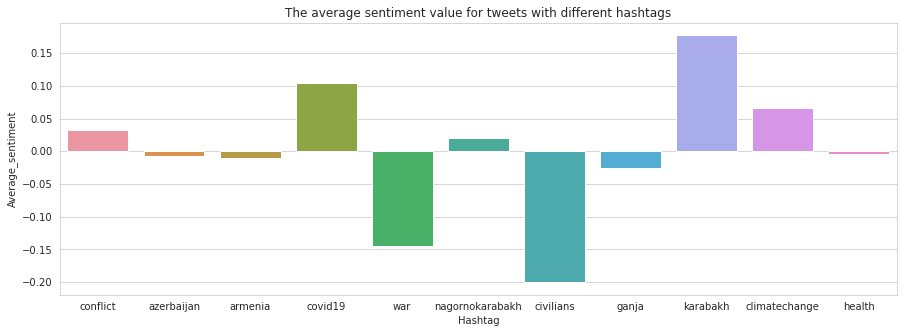

In [339]:
#Barplot shows the relation between categories and their numerical values


plt.figure(figsize=(15,5)) #Sets figure size
ax=sns.barplot(x="Hashtag",y="Average_sentiment", data=df_ave_sent) #Creates a barchart with Hashtag as the category and Average sentiment as the numerical value
ax.set(title="The average sentiment value for tweets with different hashtags")#Sets the title
plt.show()

Notably, these are the calculated average values and we don't have any information about the confidence intervals of these bars. 

However, it seems like the hashtags 'war' and 'civilians' are clearly associated with tweets with an average negative sentiment value. On the other side, hashtags such as 'covid19', 'climatechange' and 'karabakh' come along with tweets with an average positive sentiment value. 

This might seem very strange at first hand. A possible explanation could be that due to the small data set, all tweets related to covid-19 were about positive or at least neutral outcomes or simply 'neutrally' informative.

However, it is strange to see that 'azerbaijan' and 'armenia' hashtags are associated with neutral-negative tweet sentiments, but 'nagornokarabakh' and 'karabakh' are related to positive sentiment tweets on average. 

This goes against my first assumption that people who mention 'armenia' and 'azerbaijan' probably also mention 'karabakh' in their tweets. Notably, we are only comparing hashtags and not tokenised words. 

To conclude, it seems like people who use 'armenia' and 'azerbaijan' as hashtags do not necessarily use 'karabakh' as a hashtag as well due to the very different average tweet sentiment values.

In the above case, I have calculated the average sentiment value. However, when we want to plot them, it makes sense to create a dataframe with sentiment values for each tweet with the respective hashtag and let barplot do the average computing job. This comes with the advantage of error bars that indicate how significant the differences are. Also, the new dataframe with all the sentimental values will allow us to look into the distribution of each sentiment value, for example using a boxplot.

In [340]:
#Similar script as above but without calculating the average sentiment values

sentim_list=[]
tags_list=[]

#Iterate through all frequently mentioned hashtags listed in df_hasht_freq


for hashtag in df_hasht_freq.hashtag:
    tag=hashtag
    index=0
    hashtag_count=0
    sentim_value=0
    
    #Iterates through all hashtag strings to find the desired hashtag
    
    for row in clean_tweets.Clean_hashtags:
        token_hashtags=nltk.tokenize.word_tokenize(row)
           
        if index <= clean_tweets.index.values.max():
            if tag in token_hashtags:
                sentim_value=sentim_value+clean_tweets.Sentiment[index] #Adds the respective sentiment value to the variable
                sentim_list.append(sentim_value) #Adds values to the list while iterating
                tags_list.append(tag)
                sentim_value=0 #Sentiment value is set to zero after each row iteration
                
        index+=1 
        
        
df_tags_sent=pd.DataFrame() #Creates empty DataFrame
df_tags_sent["Hashtag"]=tags_list #Appends hashtag column
df_tags_sent["Sentiment"]= sentim_list #Appends sentiment value column
print(df_tags_sent)       

           Hashtag  Sentiment
0         conflict   0.000000
1         conflict   0.000000
2         conflict   0.466667
3         conflict   0.136364
4         conflict   0.287500
..             ...        ...
164  climatechange   0.000000
165         health   0.033333
166         health  -0.047917
167         health   0.000000
168         health   0.000000

[169 rows x 2 columns]


Now that we have a more complete DataFrame, we will visualise the same boxplot but with error bars:

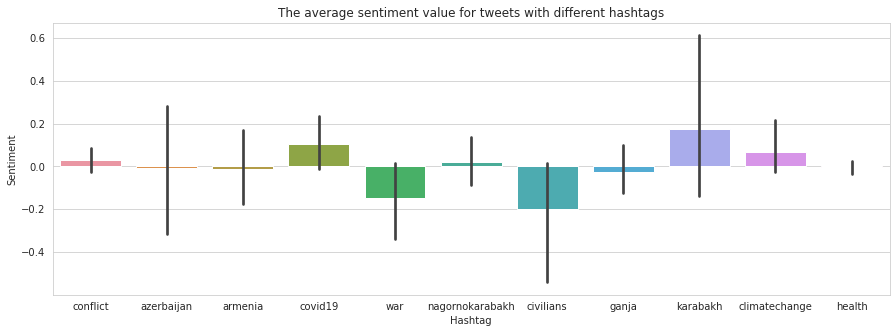

In [341]:
#Create barplot to display the average sentiment values of tweets with a specific hashtag

plt.figure(figsize=(15,5)) #Sets figure size
ax=sns.barplot(x="Hashtag",y="Sentiment", data=df_tags_sent) #Plots Hashtag against Sentiment value of the tweet
ax.set(title="The average sentiment value for tweets with different hashtags") #Sets title
plt.show()

Now that we can see the error bars, it becomes clear that all results are not that significant. Especially hashtags such as 'azerbaijan','armenia' and 'karabakh','nagornokarabakh' have partial or total error bar overlaps. 

This indicates that the confidence intervals - meaning that the value is correct in 95% of all cases - is too big to compare the average sentiment values. 

To achieve more significant results, we have to use a training data set to build our own individual sentiment analysis and get a larger data set. 

Finally, we will also take a look at the distribution of sentiment values of each category using a boxplot:

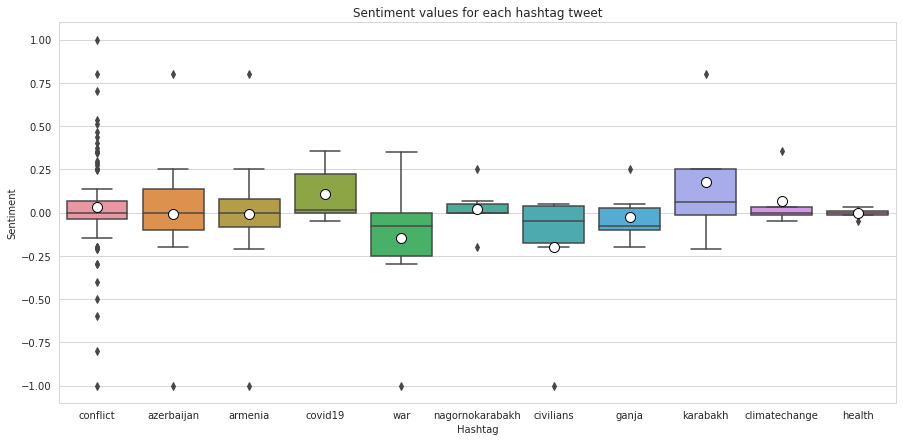

In [342]:
plt.figure(figsize=(15,7)) #Changes the size of the graph
ax=sns.boxplot(x="Hashtag", y="Sentiment", data=df_tags_sent, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white","markeredgecolor":"black", "markersize": "10"}) #Creates boxplots for each day with the respective proportion values and shows the mean value
ax.set(xlabel="Hashtag", ylabel="Sentiment") #Sets labels for both axes
#plt.yticks(np.arange(0,0.75,0.05)) #Adjusts the space between ticks on the y-axis
ax.set_title("Sentiment values for each hashtag tweet") #Sets a title for the graph
plt.show()

Although the overall results are very similar, we can see that the greatest amount of outliers can be found in tweets with the hashtag 'conflict'. Although most tweets and thus most data comprises the term 'conflict' there is no clear indication whether the sentiment is positive or negative. 

Overall, for the hashtags 'azerbaijan', 'armenia', 'war' and 'civilian' we can see some outliers (at -1) that could significantly affect the average sentiment value due to the small and sensible data size.  

REFLECTIONS AND HYPOTHESIS

(1.)Most surprisingly, the increased occurence of the term ‘conflict’ within a tweet is associated with a higher sentiment value meaning that the tweet is likely to be positive. My hypothesis 
would be that not all ‘conflict’ tweets are related to global political issues and that we have to do more advanced textual analysis to sort out unrelated tweet. This could happen via n-grams, where we try to detect multiple words together. This way, we might find out more about the context of the conflict tweet (political conflict or work related ‘conflict management’).

(2.)Equally surprising was the fact that tweets that were associated with the hashtags ‘nagornokarabakh’ or ‘karabakh’ have an overall positive sentiment, since they probably relate to the ongoing ‘Azerbaijan-Armenian’ war. One hypothesis could be, that users that use the Azerbaijan/Armenian hashtag report more negatively about the crises while users using ‘nagornokarabakh’ or ‘karabakh’ as hashtags report more positively/neutrally. 

One way to test that would be to use a larger data with timestamps over a several weeks or months. Another way to gain more accurate sentiment values would be the usage of a different analyser such as NaiveBayesAnalyzer. We could also train our own model using the Naive Bayes Classifier, build our own vocabulary and  test it with another testing data set. Using tf-idf vectorisation from the scikit library could help us to classify most important words and characterise tweets.

Also, we could leave hashtags in the tweet text while preprocessing the data and just remove the ‘#’ sign. That way, the sentiment values for tweets might change drastically since all ‘emphasized’ words are included. 

(3.)Another finding was that positive tweets are associated with users with a higher follower count. A hypothesis could be that users with higher follower numbers are linked to news agencies or politicians and that the overall emotion of their tweets are more factual and thus more positive or neutral, even when is deals with disasters and conflicts. In comparison, users with smaller follower counts are probably private users and tend to write more negatively about conflicts. To test this hypothesis, we could scrap more data using the Twitter API and include verification IDs that allow us to see whether the user has an official account. Also, we could see whether we can match certain pattern such as ‘news’ or ‘agency’ with the usernames in the ´data set.


Finally, we can also improve our pre-processing and cleaning. Hashtags might include several words that have to be splitted into substrings, for example 'stoparmenianwar' which could be splitted into 'stop', 'armenian', 'war'. For that purpose, we could use a library called ekphrasis and its segmenter function which was built on a twitter corpus.


